In [111]:
#For the below snapshots, The primary is initiated first and the companion is initiated last

import rebound
sim=rebound.Simulation()
sim.add(m=1.)
#sim.add(m=1, a=300, e=0.05)
#sim.move_to_com()
sim.integrator="whfast"
sim.dt=0.05
#sim.status()
#test

import matplotlib.pyplot as plt

import numpy as np
Testparticle= 100
a_initial=np.linspace(10,50,Testparticle)
for a in a_initial:
    sim.add(a=a,f=np.random.rand()*2.*np.pi,e=0.01)

sim.add(m=1, a=300,e=0.05, inc=np.radians(60))

sim.N_active=2

(-66.22129219728129, 301.72482343796577, -44.86240893732638, 54.13078647512624)

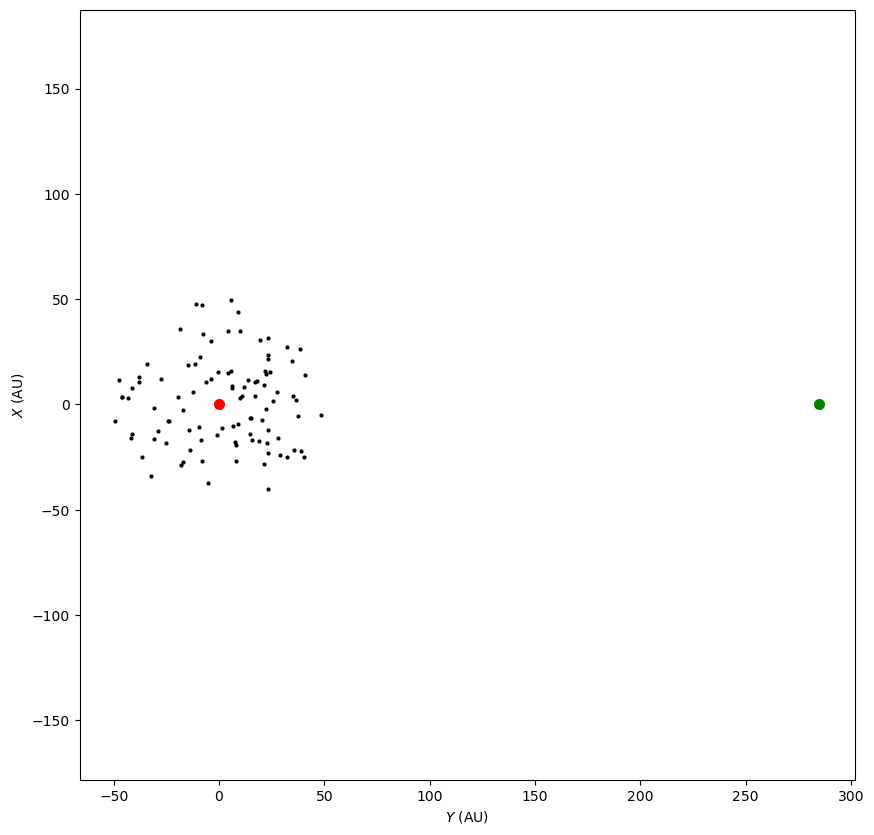

In [117]:
fig = plt.figure(figsize=(10,10))

plt.scatter(sim.particles[0].x, sim.particles[0].y,marker=".",color='r',linewidth=5)
plt.scatter(sim.particles[-1].x, sim.particles[-1].y,marker=".",color='g',linewidth=5)
ax=plt.subplot()
ax.set_ylabel("$X$ (AU)")
ax.set_xlabel("$Y$ (AU)")
for j in range(sim.N-2):
    i=j+1
    plt.scatter(sim.particles[i].x, sim.particles[i].y,marker=".",color='k',linewidth=0)
ax.axis('equal')

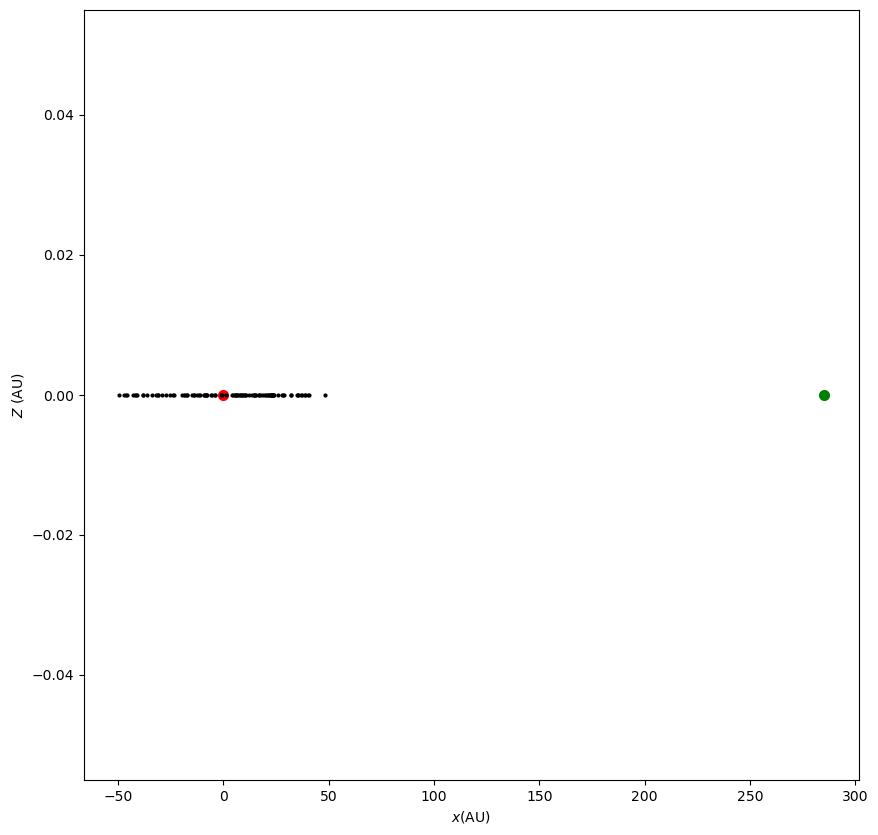

In [118]:
#Snapshot.Beginning (No time). (x,z). Debris Disk Diameter = 50 AU
fig = plt.figure(figsize=(10,10))
plt.scatter(sim.particles[0].x, sim.particles[0].z,marker=".",color='r',linewidth=5)
plt.scatter(sim.particles[-1].x, sim.particles[-1].z,marker=".",color='g',linewidth=5)
ax=plt.subplot()
ax.set_ylabel("$Z$ (AU)")
ax.set_xlabel("$x$(AU)")
for j in range(sim.N-2):
    i=j+1
    plt.scatter(sim.particles[i].x, sim.particles[i].z,marker=".",color='k',linewidth=0)


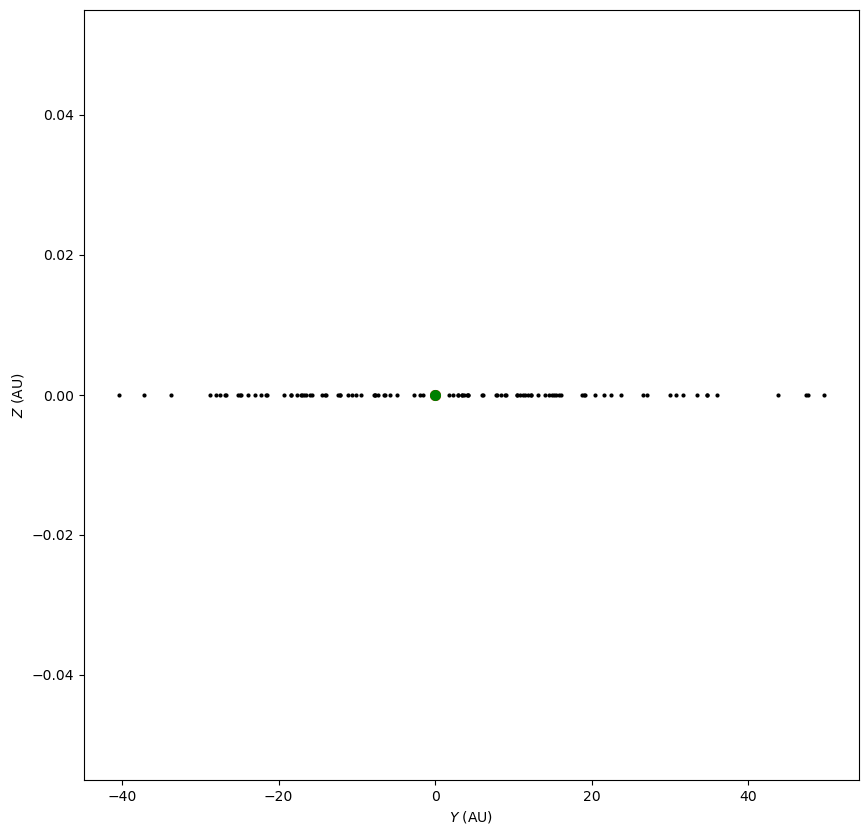

In [119]:
#Snapshot.Beginning (No time). (y,z). Debris Disk Diameter = 50 AU
fig = plt.figure(figsize=(10,10))
plt.scatter(sim.particles[0].y, sim.particles[0].z,marker=".",color='r',linewidth=5)
plt.scatter(sim.particles[-1].y, sim.particles[-1].z,marker=".",color='g',linewidth=5)
ax=plt.subplot()
ax.set_ylabel("$Z$ (AU)")
ax.set_xlabel("$Y$ (AU)")
for j in range(sim.N-2):
    i=j+1
    plt.scatter(sim.particles[i].y, sim.particles[i].z,marker=".",color='k',linewidth=0)


/home/jeremiah-r1/Software/rebound/rebound/simulation.py:1032: RuntimeWarning: At least one test particle (type 0) has finite mass. This might lead to unexpected behaviour. Set testparticle_hidewarnings=1 to hide this warning.
  warnings.warn(msg[1:], RuntimeWarning)


(-67.15404584921718, 299.23846812838286, -54.75181384386323, 58.95377558360359)

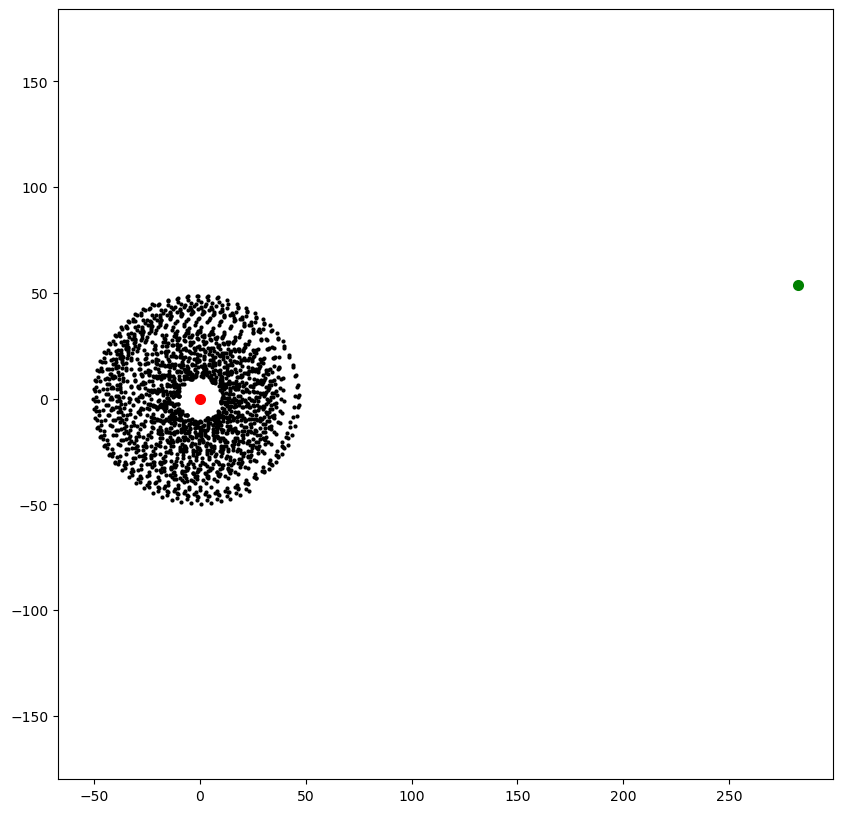

In [70]:
Time=100.*2*np.pi
N_out=20
xy=np.zeros((N_out,Testparticle,2))
times=np.linspace(0,Time,N_out)
for i, time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    for j, p in enumerate(sim.particles[1:-1]):
        xy[i][j]=[p.x,p.y]

fig = plt.figure(figsize=(10,10))
plt.scatter(sim.particles[0].x, sim.particles[0].y,marker=".",color='r',linewidth=5)
plt.scatter(sim.particles[-1].x, sim.particles[-1].y,marker=".",color='g',linewidth=5)


ax = plt.subplot()
#ax.set_xlim([-4,4])
#ax.set_ylim([-4,4])
plt.scatter(xy[:,:,0],xy[:,:,1],marker=".",color='k',linewidth=0)
ax.axis('equal')
#The stuff in the colins are the particles on the plt.scatter plot
#ax.set_yscale("log")
#put here

(-67.15404584921718, 299.23846812838286, -54.75181384386323, 58.95377558360359)

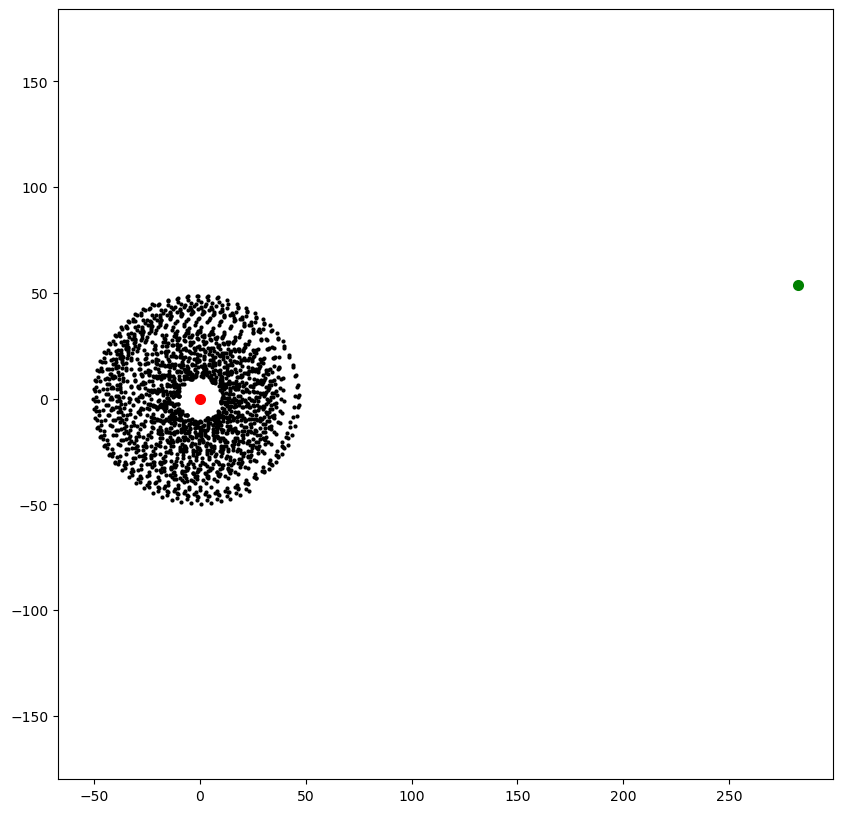

In [108]:
#Time/a,e,inc Graphs
#We also initiated the companion star after the primary for the below simulation

import rebound
sim=rebound.Simulation()
sim.add(m=1.)
sim.add(m=1, a=500, e=0.05,inc=np.radians(45))
#sim.add(m=1, a=300, e=0.05)
sim.move_to_com()
sim.integrator="whfast"
#test

import matplotlib.pyplot as plt

import numpy as np
Testparticle= 200
a_initial=np.linspace(20,100,Testparticle)
for a in a_initial:
    sim.add(primary=sim.particles[0], a=a,f=np.random.rand()*2.*np.pi,e=0.05)
    
sim.dt = sim.particles[2].calculate_orbit(primary=sim.particles[0]).P / 10.12345

sim.N_active=2


Time=1000.*2*np.pi
N_out=15
xy=np.zeros((N_out,Testparticle,2))
times = np.linspace(0., 30.*Time, N_out)


# initialize a, e, and inc arrays
# each array is a matrix [i][j] where [i] refers to the time and [j] to the particle number (the primary is excluded)
a = np.zeros((N_out, sim.N-1))
e = np.zeros((N_out, sim.N-1))
inc = np.zeros((N_out, sim.N-1))


# loop over each timestep
for i,time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    # loop over each particle
    for n in range(sim.N-2):
        m = n+2 # skip primary

        # here i'm assigning the quantities to the matrix I deifned above.
        a[i][n]=sim.particles[m].calculate_orbit(primary=sim.particles[0]).a
        e[i][n] = sim.particles[m].calculate_orbit(primary=sim.particles[0]).e
        inc[i][n] = sim.particles[m].calculate_orbit(primary=sim.particles[0]).inc

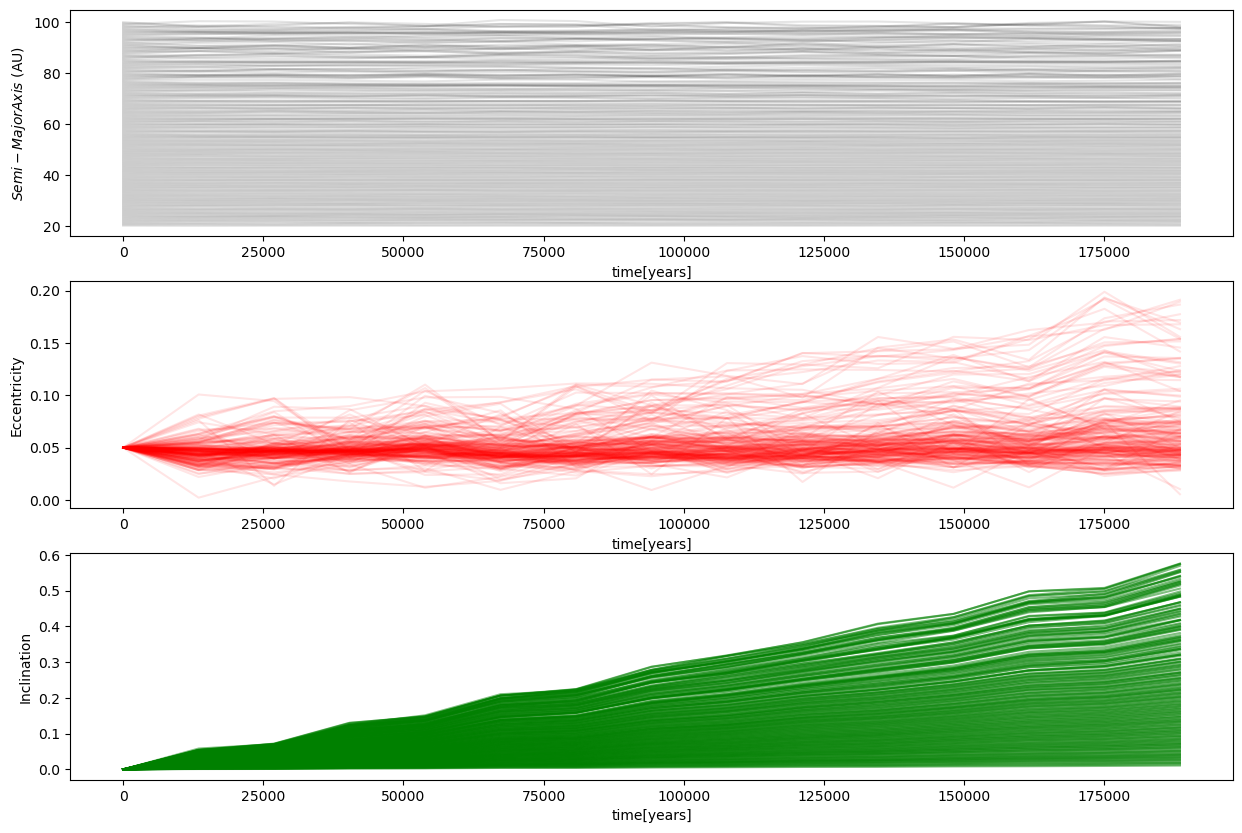

In [109]:
fig, ax = plt.subplots(figsize=(15,10), nrows = 3, ncols = 1)


# if i call a[:,:-1] it gives me all times (first entry) and all particles except the last one (which is the binary) (second entry of a)

ax[0].plot(times, a[:,:-1],alpha=.1, color='k')
ax[1].plot(times, e[:,:-1], color ='r',alpha=.1)
ax[2].plot(times, inc[:,:-1], color = 'g',alpha=.5)

ax[0].set(ylabel = '$Semi-Major Axis$ (AU)')
ax[1].set(ylabel = 'Eccentricity')
ax[2].set(ylabel = 'Inclination')
#AX.


for axi in ax:
    axi.set(xlabel = 'time[years]')